<h1 align="center">Web Mining Lab Assignment-7</h1>
                                                                                                                                        <h3 align="right">Aryan Vigyat</h3>
                                                                                                            <h3 align="right"> 20BCE1452</h3>

Spam Ham Classification using TF-IDF and Naive Bayes


Question 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('Spam-Ham-Classification.csv')

In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

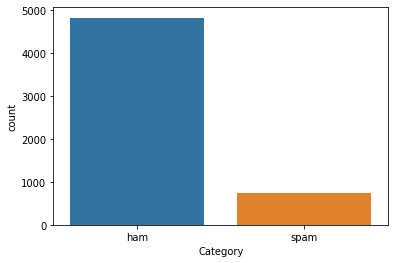

In [ ]:
sns.countplot(data=df, x='Category')

In [33]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

Creating a Pipeline of Vectorizer and Classifier

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

Split into test and train dataset


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.20, random_state = 21)

Train the Model

In [38]:
spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7f2486890ee0>)),
                ('classifier', MultinomialNB())])

**Predict Values Using the Test Dataset**

In [28]:
predictions = spam_filter.predict(x_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       999
        spam       0.74      0.99      0.85       116

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



Confusion Matrix

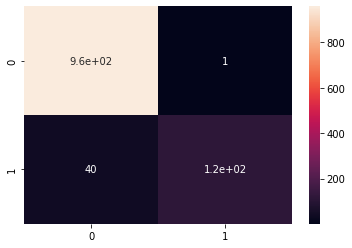

In [32]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

Question 2

In [41]:
df2=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(df2.head())
df2['Review Text'] = df2['Review Text'].fillna('')

# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
sentiment_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [57]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df2 = df2[df2['Rating'] != 3]
df2['Sentiment'] = df2['Rating'] >=4
# df2.head()
df2[df2['Sentiment']==1].count()

Unnamed: 0                 18208
Clothing ID                18208
Age                        18208
Title                      15161
Review Text                18208
Rating                     18208
Recommended IND            18208
Positive Feedback Count    18208
Division Name              18194
Department Name            18194
Class Name                 18194
Sentiment                  18208
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2['Review Text'], df2['Sentiment'], test_size=0.20, random_state = 21)

In [45]:
sentiment_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7f2486890ee0>)),
                ('classifier', MultinomialNB())])

In [48]:
predictions = sentiment_filter.predict(x_test)


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

       False       0.01      1.00      0.02         4
        True       1.00      0.88      0.94      4119

    accuracy                           0.88      4123
   macro avg       0.50      0.94      0.48      4123
weighted avg       1.00      0.88      0.94      4123



Confusion Matrix

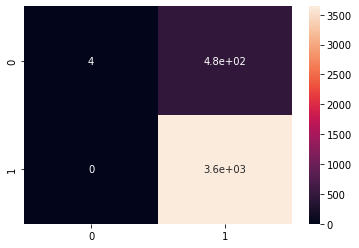

In [50]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)